# Лабораторная 2_Gilin

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib --upgrade

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

1. Скачать или импортировать датасет Wine, после чего отобразить первые и последние 5 строк датасета

In [6]:
wine = fetch_ucirepo(id=109) 
y = wine.data.targets
X = wine.data.features
#print(y)//test
#print(X)//test
print (X.head(5))
print (X.tail(5))
#В данном случае в аргументе я не был обязан ставить "5", т.к. 5 - это дефолтное значение. 
#Однако, для точности, я решил его указать

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  
0                        

2. Необходимо рассмотреть данные и провести анализ (количество семплов, типы данных в ячейках, распределение, корреляция.
3. Визуализация предыдущего пункта при помощи sns&plt и анализ полученных результатов

In [7]:
print(len(wine.data.features))
print(X.shape[0])
#Это два разных способа, как посмотреть количество семплов в датасете. 
#Таким образом, приходим к выводу, что их 178
#Это совпадает с нашим предыдущим запросом - от 0 до 177, когда выводили первые и последние 5 строк.

178
178


In [8]:
#types_data_
print(X.info())
print(X.dtypes)
#По смыслу, если стоит задача исключительно узнать типы данных в ячейках, достаточно воспользоваться второй строкой. 
#Первая же обладает избыточной информацией для подобного запроса.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [9]:
#Таким образом, даже без подробного анализа мы уже можем прийти к некоторым первичным выводам.
#Данный датасет представляет анализ трех сортов вин (то бишь классы), выращенных в одном регионе.
#В результате анализа было определено количество 13 компонентов (aka feature), 
#Features - содержание спирта, яблочной кислоты, и т.д.
#Видно, что фичи в основном выдают результат в виде float, то есть число с плавающей точкой, что логично, т.к. результат, очевидно, не целый.
#Однако, некоторые фичи - интеджер, что тоже логично, т.к. содержание аминокислоты и магния обычно указывают в условных mg/L

In [58]:
#distribution info
print(X.describe())
#Приступаем к анализу имеющихся у нас данных.
#describe обсчитывает все данные фичи и выдает следующий список:
#количество, среднее, стандартное отклонение, минимум/максимум
#а также данные из разряда 25% данных по этиловому спирту <12.3625, а 75% - выше и так далее.

          Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

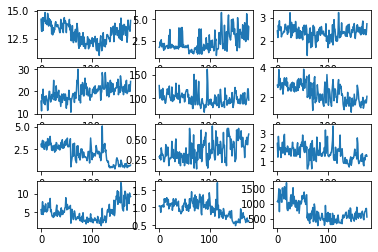

In [11]:
plt.subplot(4, 3, 1)
plt.plot(X[['Alcohol']])
plt.subplot(4, 3, 2)
plt.plot(X[['Malicacid']])
plt.subplot(4, 3, 3)
plt.plot(X[['Ash']])
plt.subplot(4, 3, 4)
plt.plot(X[['Alcalinity_of_ash']])
plt.subplot(4, 3, 5)
plt.plot(X[['Magnesium']])
plt.subplot(4, 3, 6)
plt.plot(X[['Total_phenols']])
plt.subplot(4, 3, 7)
plt.plot(X[['Flavanoids']])
plt.subplot(4, 3, 8)
plt.plot(X[['Nonflavanoid_phenols']])
plt.subplot(4, 3, 9)
plt.plot(X[['Proanthocyanins']])
plt.subplot(4, 3, 10)
plt.plot(X[['Color_intensity']])
plt.subplot(4, 3, 11)
plt.plot(X[['Hue']])
plt.subplot(4, 3, 12)
plt.plot(X[['Proline']])

In [12]:
print(X.corr())
# Отсюда мы выводим корреляционную матрицу, значения в которой находятся от -1 до 1, где 1 - полная корреляция, -1 - ее отсутствие.
# Очевидно, что на главной диагонали мы получим единицы,т.к. А с А коррелирует идеально.

                               Alcohol  Malicacid       Ash  \
Alcohol                       1.000000   0.094397  0.211545   
Malicacid                     0.094397   1.000000  0.164045   
Ash                           0.211545   0.164045  1.000000   
Alcalinity_of_ash            -0.310235   0.288500  0.443367   
Magnesium                     0.270798  -0.054575  0.286587   
Total_phenols                 0.289101  -0.335167  0.128980   
Flavanoids                    0.236815  -0.411007  0.115077   
Nonflavanoid_phenols         -0.155929   0.292977  0.186230   
Proanthocyanins               0.136698  -0.220746  0.009652   
Color_intensity               0.546364   0.248985  0.258887   
Hue                          -0.071747  -0.561296 -0.074667   
0D280_0D315_of_diluted_wines  0.072343  -0.368710  0.003911   
Proline                       0.643720  -0.192011  0.223626   

                              Alcalinity_of_ash  Magnesium  Total_phenols  \
Alcohol                               -0

<Axes: >

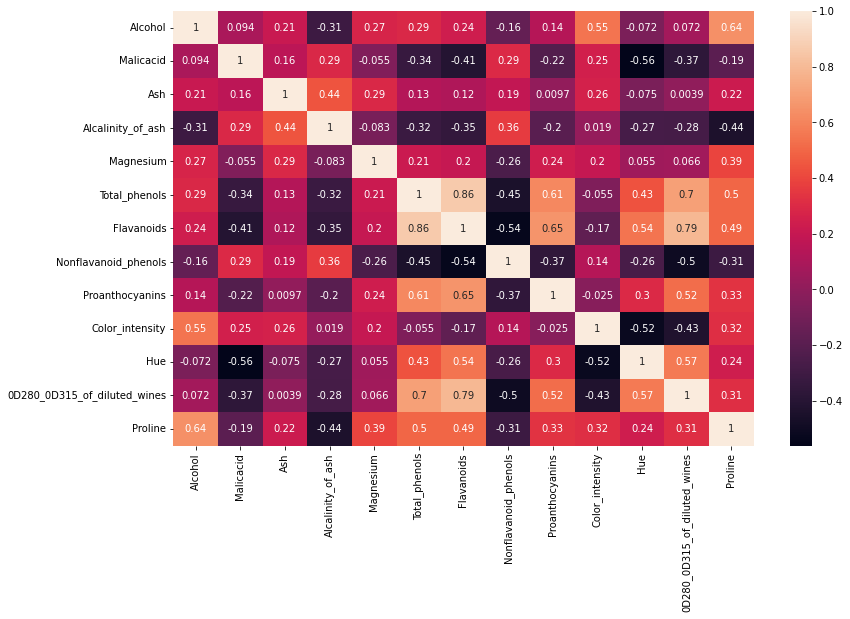

In [13]:
plt.figure(figsize=(13, 8))
sns.heatmap(X.corr(), annot=True)
# Визуализируем данные матрицы, полученной в предыдущей части, для того, чтобы найти два самых корр. признака и два самых не корр. 

In [14]:
#Таким образом, обучать DT мы будем на Flavanoids+Total_phenols как самых корр (0.86)
# и на MalicAcid + Hue как самых некорр (-0,56)
# * - к слову, это супер логично, так как флавоноиды - это фенолы :)

C:\Users\Gilin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


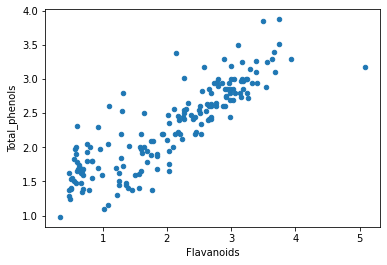

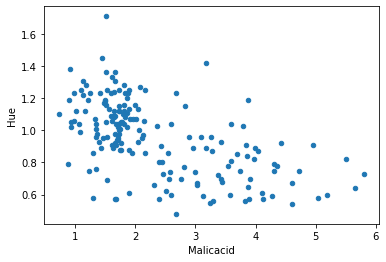

In [15]:
#Визуализируем корреляцию выбранных признаков, чтобы убедиться в правдивости полученных результатов

X.plot('Flavanoids', 'Total_phenols', kind='scatter')
plt.show()

X.plot('Malicacid', 'Hue', kind='scatter')
plt.show()

In [43]:
#Прежде чем приступим к дальнейшим действиям, необходимо написать фикс датасета для корректной работы XGBoost
#Проблема заключалась в следующем: для XGBoost необходимо, чтобы классы начинались от 0, а в датасете они представлены как 123.
#Смысл в переобозначении классов 1->0 2->1 3->2.
if y.at[0, 'class'] == 0:
    print('Indices already fixed')
else:
    for i in range(178):
        if y.at[i, 'class'] == 1:
            y.at[i, 'class'] = 0
        elif y.at[i, 'class'] == 2:
            y.at[i, 'class'] = 1
        else:
           y.at[i, 'class'] = 2
        print(y.at[i, 'class']) #test

Indices already fixed


In [17]:
data1 = X.drop(['Alcohol', 'Malicacid','Ash','Alcalinity_of_ash','Magnesium','Nonflavanoid_phenols','Proanthocyanins','Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines','Proline'], axis=1)
data2 = X.drop(['Alcohol', 'Total_phenols','Ash','Alcalinity_of_ash','Magnesium','Nonflavanoid_phenols','Proanthocyanins','Color_intensity', 'Flavanoids', '0D280_0D315_of_diluted_wines','Proline'], axis=1)
#data1 - по двум корр
#data2 - по двум не корр

Разбить данные test+train.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
data1_X_train, data1_X_test, data1_y_train, data1_y_test = train_test_split(data1, y, test_size=0.33, random_state=42)
data2_X_train, data2_X_test, data2_y_train, data2_y_test = train_test_split(data2, y, test_size=0.33, random_state=42)
#В примере был другой рандом, но в интернете утверждают, что принято использовать 42ой.

In [21]:
model_DT_1 = DecisionTreeClassifier()
model_DT_2 = DecisionTreeClassifier()
#В дальнейшем _1 - по двум корр, _2 - по двум не корр

In [22]:
model_DT_1.fit(data1_X_train, data1_y_train)

DecisionTreeClassifier()

In [23]:
model_DT_2.fit(data2_X_train, data2_y_train)

DecisionTreeClassifier()

In [26]:
data1_y_prob = model_DT_1.predict_proba(data1_X_test)[:, 1]
data1_y_pred = np.where(data1_y_prob_1 > 0.33, 1, 0)

In [27]:
data2_y_prob = model_DT_2.predict_proba(data2_X_test)[:, 1]
data2_y_pred = np.where(data2_y_prob_1 > 0.33, 1, 0)

In [31]:
print(model_DT_1.score(data1_X_test, data1_y_pred))
print(model_DT_2.score(data2_X_test, data2_y_pred))

0.7288135593220338
0.7966101694915254


In [35]:
print('По двум корр: ')
print(f1_score(data1_y_test, data1_y_pred, average='macro'))
print(f1_score(data1_y_test, data1_y_pred, average='micro'))
print(f1_score(data1_y_test, data1_y_pred, average='weighted'))
print('По двум не корр: ')
print(f1_score(data2_y_test, data2_y_pred, average='macro'))
print(f1_score(data2_y_test, data2_y_pred, average='micro'))
print(f1_score(data2_y_test, data2_y_pred, average='weighted'))

По двум корр: 
0.417929292929293
0.5423728813559322
0.47303543913713403
По двум не корр: 
0.37481146304675717
0.4915254237288136
0.4254927525116957


In [37]:
print('По двум корр: ')
print('accuracy: ', accuracy_score(data1_y_test, data1_y_pred))
print('pres: ', precision_score(data1_y_test, data1_y_pred, average='micro', zero_division=0))
print('recall: ', recall_score(data1_y_test, data1_y_pred, average='micro', zero_division=0))
print('По двум не корр: ')
print('accuracy: ', accuracy_score(data2_y_test, data2_y_pred))
print('pres: ', precision_score(data2_y_test, data2_y_pred, average='micro', zero_division=0))
print('recall: ', recall_score(data2_y_test, data2_y_pred, average='micro', zero_division=0))

По двум корр: 
accuracy:  0.5423728813559322
pres:  0.5423728813559322
recall:  0.5423728813559322
По двум не корр: 
accuracy:  0.4915254237288136
pres:  0.4915254237288136
recall:  0.4915254237288136


In [38]:
#Общий вывод по всем метрикам - корр дает результаты чуть лучше, чем не корр, но с большой оговоркой
#Оговорка - что по корр, что по не корр, результаты достаточно слабенькие


In [39]:
confusion_matrix(data1_y_test, data1_y_pred)

array([[15,  5,  0],
       [ 7, 17,  0],
       [13,  2,  0]], dtype=int64)

In [40]:
#Собственно матрица в очередной раз это доказывает...

In [41]:
confusion_matrix(data2_y_test, data2_y_pred)

array([[12,  8,  0],
       [ 7, 17,  0],
       [12,  3,  0]], dtype=int64)

XGboost

In [44]:
model_XGB = XGBClassifier(random_state=14)
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [45]:
y_pred = model_XGB.predict(X_test)
#print(y_pred)
print(model_XGB.score(X_test, y_pred))

1.0


In [46]:
y_prob = model_XGB.predict_proba(X_test)
#y_prob

Text(0.5, 15.0, 'Predicted label')

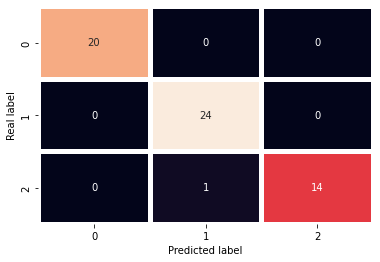

In [47]:
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, linewidth=5, cbar=None)
plt.ylabel('Real label')
plt.xlabel('Predicted label')

In [49]:
#Видим, что результат гораздо лучше, чем в DT, осталось посмотреть метрики

In [50]:
print('macrof1: ', f1_score(y_test, y_pred, average='macro'))
print('microf1: ', f1_score(y_test, y_pred, average='micro'))
print('weighted: ', f1_score(y_test, y_pred, average='weighted'))
print('accuracy: ', accuracy_score(y_test, y_pred))
print('pres: ', precision_score(y_test, y_pred, average='micro', zero_division=0))
print('recall: ', recall_score(y_test, y_pred, average='micro', zero_division=0))

macrof1:  0.9817030260380014
microf1:  0.9830508474576272
weighted:  0.9829315712258019
accuracy:  0.9830508474576272
pres:  0.9830508474576272
recall:  0.9830508474576272


In [52]:
#Странно то, что Pres=Recall, f1 совпадает по определению тогда.
#Однако, результат очень хороший в любом случае

ROC_Curve


In [53]:
auc_roc = roc_auc_score(y_test, y_prob, multi_class="ovr")
auc_roc

0.9981962481962482

In [54]:
fp, tp, thresh = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc = auc(fp, tp)
roc_auc

0.9976190476190476

Text(0.5, 0, 'FP rate')

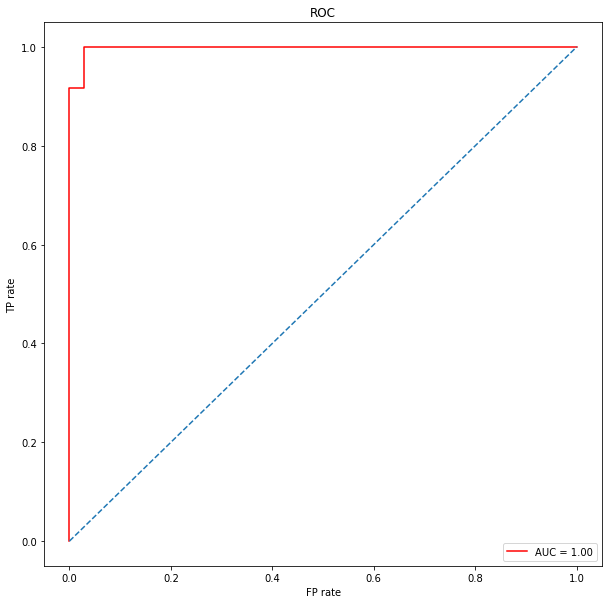

In [60]:
plt.figure(figsize=(10, 10))
plt.title('ROC')
plt.plot(fp, tp, color='red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('TP rate')
plt.xlabel('FP rate')

# Не знаю, почему срезался конец кривой. Грубость отрисовки?